In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data= pd.read_csv('Predict Price of Airline Tickets.csv')
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:
# It analyzes the DataFrame column sets of mixed data types
data.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [4]:
#checking for null values
print(data.isnull().sum()) 

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64


In [5]:
data=data.dropna()

In [6]:
print(data.isnull().sum()) 

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64


In [7]:
#we don't need it as we already have total_stops
data=data.drop(['Route'], axis=1)

In [8]:
#Extracting day,month,year,weekday from Date of Journey
data['Journey_Day'] = pd.to_datetime(data.Date_of_Journey).dt.day
data['Journey_Month'] = pd.to_datetime(data.Date_of_Journey).dt.month


C:\Users\Tarek Samy\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '24/03/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\Tarek Samy\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '24/06/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\Tarek Samy\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '27/05/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\Tarek Samy\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '18/04/2019' in DD/MM/YYYY format. Prov

In [9]:
data.drop(labels = 'Date_of_Journey', axis = 1, inplace = True)
data.head()

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month
0,IndiGo,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,Delhi,Cochin,09:25,04:25 10 Jun,19h,2 stops,No info,13882,6,9
3,IndiGo,Kolkata,Banglore,18:05,23:30,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,Banglore,New Delhi,16:50,21:35,4h 45m,1 stop,No info,13302,3,1


In [10]:
#Converting duration into minutes
def duration(test):
    test = test.strip()
    total=test.split(' ')
    to=total[0]
    hrs=(int)(to[:-1])*60
    if((len(total))==2):
        mint=(int)(total[1][:-1])
        hrs=hrs+mint
    test=str(hrs)
    return test
data['Duration']=data['Duration'].apply(duration)


### Extracting whether its a morning,evening,night or afternoon flight from departure time & arrival time of the flight

In [11]:
#Extracting whether its a morning,evening,night or afternoon flight from departure time & arrival time of the flight
def deparrtime(x):
    x=x.strip()
    tt=(int)(x.split(':')[0])
    if(tt>=16 and tt<21):
        x='Evening'
    elif(tt>=21 or tt<5):
        x='Night'
    elif(tt>=5 and tt<11):
        x='Morning'
    elif(tt>=11 and tt<16):
        x='Afternoon'
    return x
data['Dep_Time']=data['Dep_Time'].apply(deparrtime)
data['Arrival_Time']=data['Arrival_Time'].apply(deparrtime)


In [12]:
#Converting total_stops to 0,1,2,3 and so on.
def stops(x):
    if(x=='non-stop'):
        x=str(0)
    else:
        x.strip()
        stps=x.split(' ')[0]
        x=stps
    return x
data['Total_Stops']=data['Total_Stops'].apply(stops)

In [13]:
#Converting duration to int values only 
duration = list(data['Duration'])

for i in range(len(duration)):
    if len(duration[i].split())!=2:
        if "h" in duration[i]:
            duration[i] = duration[i].strip()+' 0m'
        else:
            duration[i]= "0h "+duration[i]
            
duration_hours = []
duration_mins = []

for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep="h")[0]))
    duration_mins.append(int(duration[i].split(sep="m")[0].split()[-1]))
    
data['Duration_hours']= duration_hours
data['Duration_mins']= duration_mins


In [14]:
data.head()

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,Night,Night,170,0,No info,3897,24,3,0,170
1,Air India,Kolkata,Banglore,Morning,Afternoon,445,2,No info,7662,5,1,0,445
2,Jet Airways,Delhi,Cochin,Morning,Night,1140,2,No info,13882,6,9,0,1140
3,IndiGo,Kolkata,Banglore,Evening,Night,325,1,No info,6218,5,12,0,325
4,IndiGo,Banglore,New Delhi,Evening,Night,285,1,No info,13302,3,1,0,285


# EDA

[Text(0, 0, '1'),
 Text(1, 0, '3'),
 Text(2, 0, '4'),
 Text(3, 0, '5'),
 Text(4, 0, '6'),
 Text(5, 0, '9'),
 Text(6, 0, '12')]

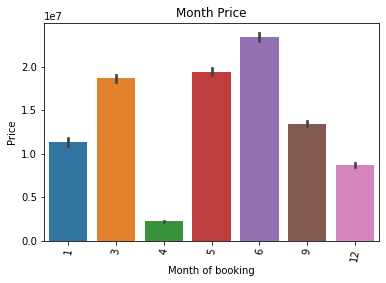

<Figure size 720x576 with 0 Axes>

In [15]:
#Journey month v/s total fare
v1=sns.barplot(x='Journey_Month', y='Price', data=data,estimator=sum)
v1.set_title('Month Price')
plt.figure(figsize= (10,8))
v1.set_ylabel('Price')
v1.set_xlabel('Month of booking')
v1.set_xticklabels(v1.get_xticklabels(), rotation=80)

We see that the price of tickets is increasing in months april & june  This can be due to Summer vacations in april & june for schools/colleges, hence most families are also generally going for vacations around this time.
The count of flights is lowest on the month of April, this can be because : Schools,colleges have their final exams around this time, offices are mostly busy in the month of April as it is the end of Quarter 1

In [16]:
#count of flights per month in intiger 
top_month=data.Journey_Month.value_counts().head(10)
top_month

6     2535
3     2211
5     2074
9     1406
1     1075
12     957
4      424
Name: Journey_Month, dtype: int64

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'New Delhi'),
  Text(1, 0, 'Banglore'),
  Text(2, 0, 'Cochin'),
  Text(3, 0, 'Kolkata'),
  Text(4, 0, 'Delhi'),
  Text(5, 0, 'Hyderabad')])

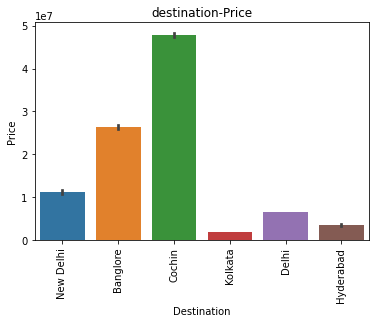

In [17]:
# Destination vs AveragePrice
v1=sns.barplot(x='Destination', y='Price', data=data,estimator=sum)
v1.set_title('destination-Price')
v1.set_ylabel('Price')
v1.set_xlabel('Destination')
v1.set_xticklabels(v1.get_xticklabels())
plt.xticks(rotation = 90)

The airfare price range in cochin is the maximum, this can be due to: Jet fuel prices in Delhi had increased in 2018, it is also political seat of power and a highly visited place for vacations

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Banglore'),
  Text(1, 0, 'Kolkata'),
  Text(2, 0, 'Delhi'),
  Text(3, 0, 'Chennai'),
  Text(4, 0, 'Mumbai')])

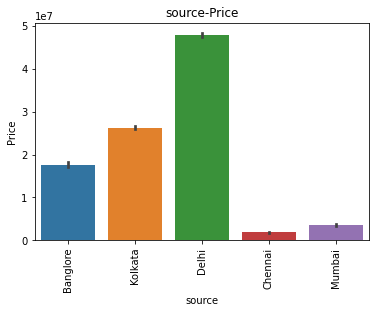

In [18]:
# Source vs AveragePrice
v1=sns.barplot(x='Source', y='Price', data=data,estimator=sum)
v1.set_title('source-Price')
v1.set_ylabel('Price')
v1.set_xlabel('source')
v1.set_xticklabels(v1.get_xticklabels())
plt.xticks(rotation = 90)

The airfare price range in Delhi is the maximum, this can be due to: Jet fuel prices in Delhi had increased in the year of 2018 by 26.4%, it is also the National Capital, political seat of power and a highly visited place for vacations

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'IndiGo'),
  Text(1, 0, 'Air India'),
  Text(2, 0, 'Jet Airways'),
  Text(3, 0, 'SpiceJet'),
  Text(4, 0, 'Multiple carriers'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'Vistara'),
  Text(7, 0, 'Air Asia'),
  Text(8, 0, 'Vistara Premium economy'),
  Text(9, 0, 'Jet Airways Business'),
  Text(10, 0, 'Multiple carriers Premium economy'),
  Text(11, 0, 'Trujet')])

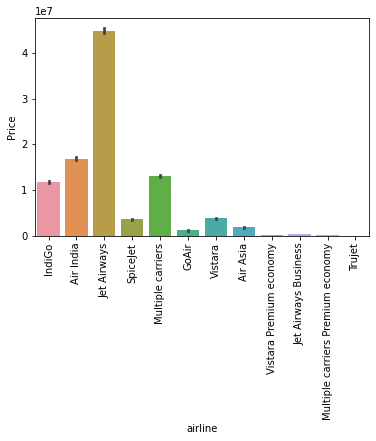

In [19]:
# airline vs AveragePrice
v1=sns.barplot(x='Airline', y='Price', data=data,estimator=sum)
v1.set_ylabel('Price')
v1.set_xlabel('airline')
v1.set_xticklabels(v1.get_xticklabels())
plt.xticks(rotation = 90)

jet airways and Air India are full service airlines are and always highly priced due to various services they provide. Low-cost carriers like indigo and spicejet have a lower and similar fare range .

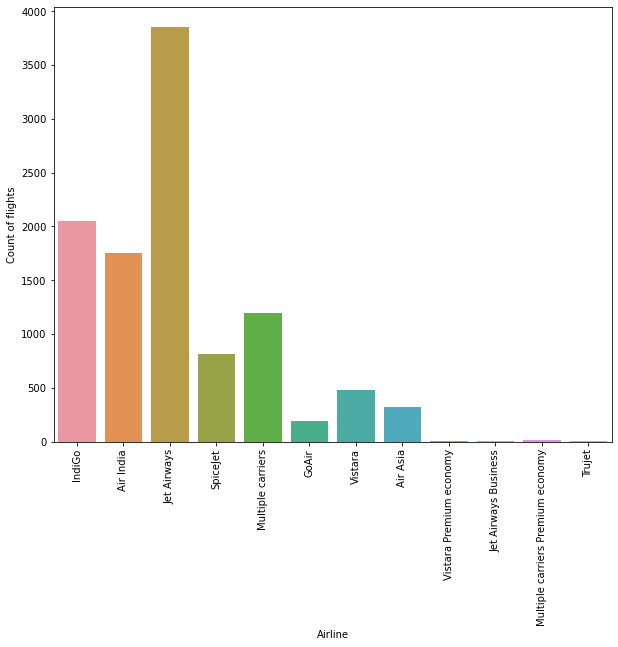

In [20]:
#Count of flights with different months
plt.figure(figsize= (10,8))
ax=sns.countplot(x = 'Airline', data =data)
plt.xlabel('Airline')
plt.ylabel('Count of flights')
plt.xticks(rotation = 90)
plt.show()

jet airways and Air India are full service airlines are and always highly priced due to various services they provide. Low-cost carriers like indigo and spicejet have a lower and similar fare range 

[Text(0, 0, 'Night'),
 Text(1, 0, 'Morning'),
 Text(2, 0, 'Evening'),
 Text(3, 0, 'Afternoon')]

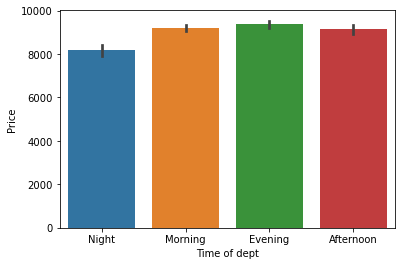

In [21]:
#Deptarure time v/s AveragePrice
v2=sns.barplot(x='Dep_Time', y='Price', data=data)
v2.set_ylabel('Price')
v2.set_xlabel('Time of dept')
v2.set_xticklabels(v2.get_xticklabels())

[Text(0, 0, 'Night'),
 Text(1, 0, 'Afternoon'),
 Text(2, 0, 'Morning'),
 Text(3, 0, 'Evening')]

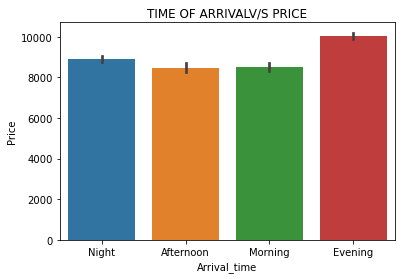

In [22]:
#TIME OF ARRIVAL V/S average price
v3=sns.barplot(x='Arrival_Time', y='Price', data=data)
v3.set_title('TIME OF ARRIVALV/S PRICE')
v3.set_ylabel('Price')
v3.set_xlabel('Arrival_time')
v3.set_xticklabels(v3.get_xticklabels())

Early Morning flights are always cheaper and so are midnight flight prices. Evening flight fares are expensive due to more demand and is the most convenient time to tarvel for most people

[Text(0, 0, '0'),
 Text(1, 0, '2'),
 Text(2, 0, '1'),
 Text(3, 0, '3'),
 Text(4, 0, '4')]

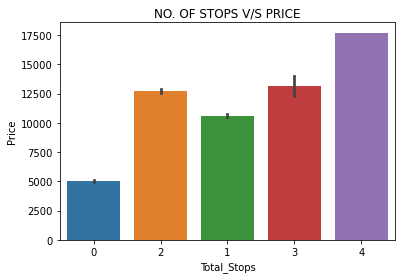

In [23]:
#total stops v/s average price
v4=sns.barplot(x='Total_Stops', y='Price', data=data)
v4.set_title('NO. OF STOPS V/S PRICE')
v4.set_ylabel('Price')
v4.set_xlabel('Total_Stops')
v4.set_xticklabels(v4.get_xticklabels())

As a direct/non-stop flight is accounting for fare of only one flight for a trip, its average fair is the least. As the no. of stops/layovers increase, the fare price goes up accounting for no. of flights and due to other resources being used up for the same

In [24]:
# time of departure v/s count of flights
top_time=data.Dep_Time.value_counts().head(10)
top_time

Morning      4331
Evening      2829
Afternoon    2017
Night        1505
Name: Dep_Time, dtype: int64

In [25]:
Airline =data[["Airline"]]

Airline = pd.get_dummies(Airline, drop_first= True)


Source = data[["Source"]]

Source = pd.get_dummies(Source, drop_first= True)


Destination =data[["Destination"]]

Destination = pd.get_dummies(Destination, drop_first= True)

data= pd.concat([data, Airline, Source, Destination], axis = 1)


In [26]:
data.head()

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,Night,Night,170,0,No info,3897,24,...,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,Morning,Afternoon,445,2,No info,7662,5,...,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,Morning,Night,1140,2,No info,13882,6,...,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,Evening,Night,325,1,No info,6218,5,...,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,Evening,Night,285,1,No info,13302,3,...,0,0,0,0,0,0,0,0,0,1


In [27]:
data=data.drop(['Airline','Source','Destination'],axis=1)

In [28]:
data=data.drop(['Arrival_Time','Dep_Time'],axis=1)

In [29]:
data.head()

,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,170,0,No info,3897,24,3,0,170,0,0,...,0,0,0,0,0,0,0,0,0,1
1,445,2,No info,7662,5,1,0,445,1,0,...,0,0,0,1,0,0,0,0,0,0
2,1140,2,No info,13882,6,9,0,1140,0,0,...,0,0,1,0,0,1,0,0,0,0
3,325,1,No info,6218,5,12,0,325,0,0,...,0,0,0,1,0,0,0,0,0,0
4,285,1,No info,13302,3,1,0,285,0,0,...,0,0,0,0,0,0,0,0,0,1


In [30]:
data.replace({'Total_Stops':{'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4}},inplace=True)

In [31]:
data.head()

,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,170,0,No info,3897,24,3,0,170,0,0,...,0,0,0,0,0,0,0,0,0,1
1,445,2,No info,7662,5,1,0,445,1,0,...,0,0,0,1,0,0,0,0,0,0
2,1140,2,No info,13882,6,9,0,1140,0,0,...,0,0,1,0,0,1,0,0,0,0
3,325,1,No info,6218,5,12,0,325,0,0,...,0,0,0,1,0,0,0,0,0,0
4,285,1,No info,13302,3,1,0,285,0,0,...,0,0,0,0,0,0,0,0,0,1


In [32]:
 data=data.drop(['Duration'],axis=1)

In [33]:
data.head()

,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,No info,3897,24,3,0,170,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,2,No info,7662,5,1,0,445,1,0,0,...,0,0,0,1,0,0,0,0,0,0
2,2,No info,13882,6,9,0,1140,0,0,0,...,0,0,1,0,0,1,0,0,0,0
3,1,No info,6218,5,12,0,325,0,0,1,...,0,0,0,1,0,0,0,0,0,0
4,1,No info,13302,3,1,0,285,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [34]:
data.drop('Additional_Info',axis = 1, inplace = True)

In [35]:
data.drop('Duration_hours',axis = 1, inplace = True)

In [36]:
#separate independent & dependent data
X=data.drop('Price',axis=1)
y=data['Price']

In [37]:
X.head()

,Total_Stops,Journey_Day,Journey_Month,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,3,170,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2,5,1,445,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,2,6,9,1140,0,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0
3,1,5,12,325,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1,3,1,285,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [38]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.67, random_state = 1)

In [39]:
# Fitting Simple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)


LinearRegression()

In [40]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)
y_pred

array([ 5525.79683876, 11886.84119969, 11889.73595838, ...,
        6767.54905246,  3159.13864251, 11448.46978249])

In [41]:
from sklearn import metrics
print("MSE:",metrics.mean_squared_error(y_pred,y_test))
print("MAE:",metrics.mean_absolute_error(y_pred,y_test))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_pred,y_test)))
print("r2_score:",metrics.r2_score(y_test,y_pred))

MSE: 8033031.631886527
MAE: 1997.1324711003656
RMSE: 2834.260332412414
r2_score: 0.6281649289220155
